# Blood Group Prediction Using Fingerprint Impressions with Deep Learning

#                                                         ABSTRACT : 

Blood group detection is an essential procedure in medical diagnostics regarding transfusion medicine, emergency healthcare, and personalized treatment planning. Presently, these methods include physically drawing blood and testing in the laboratory, which is time-consuming and takes into account the availability of specialized resources. It is a invasive approach. Our project tackles the problem by introducing a ground breaking, non-invasive alternative using fingerprint images, marking a significant step forward in healthcare technology. This includes the image processing techniques with segmentation process to detect the classification of blood group. Here we are implementing Convolutional neural network and Deep learning for the image processing. This CNN and Deep learning-based blood group detection system brings tremendous changes in terms of speed, accessibility, and accuracy. The deployment of this system through the web platform ensures that it will be friendly to users and compatible across settings-from advanced medical facilities to very poor clinics.

#                                                   Problem Statement:

The objective of this project is to accurately predict an individual's blood group (A+, A-, B+, B-, O+, O-, AB+, AB-) by analyzing fingerprint impressions using deep learning techniques. This model aims to provide an innovative and non-invasive method for blood group detection.

#                                                     Data Collection:
The dataset is borrowed from Kaggle, https://www.kaggle.com/datasets/rajumavinmar/finger-print-based-blood-group-dataset

Dataset Overview: This dataset consists of fingerprint images categorized into different blood groups. The dataset is structured in a hierarchical format, with separate folders for each blood type. The total dataset comprises 4,000 fingerprint images, distributed among eight blood groups:

Blood Group Categories and Distribution: A+ : 500 images A- : 500 images AB+ : 500 images AB- : 500 images B+ : 500 images 
B- : 500 images O+ : 500 images O- : 500 images

Each image represents a fingerprint impression and is labeled according to the blood group of the individual. The dataset is structured in a way that each blood group has its own dedicated folder containing the respective images.

In [27]:
!pip install tensorflow==2.15.0 tensorflow-decision-forests tf-keras


     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
      --------------------------------------- 0.3/15.2 MB ? eta -:--:--
     -- ------------------------------------- 0.8/15.2 MB 2.2 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/15.2 MB 2.8 MB/s eta 0:00:05
     ------ --------------------------------- 2.4/15.2 MB 3.3 MB/s eta 0:00:04
     -------- ------------------------------- 3.4/15.2 MB 3.5 MB/s eta 0:00:04
     ----------- ---------------------------- 4.5/15.2 MB 3.9 MB/s eta 0:00:03
     -------------- ------------------------- 5.5/15.2 MB 4.1 MB/s eta 0:00:03
     ----------------- ---------------------- 6.8/15.2 MB 4.4 MB/s eta 0:00:02
     -------------------- ------------------- 7.9/15.2 MB 4.5 MB/s eta 0:00:02
     ------------------------ --------------- 9.2/15.2 MB 4.7 MB/s eta 0:00:02
     --------------------------- ------------ 10.5/15.2 MB 4.9 MB/s eta 0:00:01
     ------------------------------- -------- 11.8/15.2 MB 5.0 MB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.72 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.


In [29]:
!pip uninstall -y tensorflow tf-keras keras


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: tf_keras 2.15.1
Uninstalling tf_keras-2.15.1:
  Successfully uninstalled tf_keras-2.15.1
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0


In [30]:
!pip install tensorflow==2.15.1


  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/300.9 MB 4.8 MB/s eta 0:01:03
   ---------------------------------------- 1.8/300.9 MB 5.3 MB/s eta 0:00:57
   ---------------------------------------- 3.1/300.9 MB 5.6 MB/s eta 0:00:54
    --------------------------------------- 4.5/300.9 MB 5.7 MB/s eta 0:00:52
    --------------------------------------- 5.5/300.9 MB 5.8 MB/s eta 0:00:52
    --------------------------------------- 7.1/300.9 MB 6.0 MB/s eta 0:00:50
   - -------------------------------------- 8.4/300.9 MB 6.0 MB/s eta 0:00:49
   - -------------------------------------- 9.7/300.9 MB 6.0 MB/s eta 0:00:49
   - -------------------------------------- 11.0/300.9 MB 6.1 MB/s eta 0:00:48
   - -------------------------------------- 12.3/300.9 MB 6.1 MB/s eta 0:00:48
   - -------------------------------------- 13.9/300.9 MB 6.2 MB/s eta 0:00:47
   --

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflowjs 4.22.0 requires tf-keras>=2.13.0, which is not installed.


In [35]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)



# Alternatively, check the standalone Keras version if installed separately
try:
    import keras
    print("Standalone Keras Version:", keras.__version__)
except ImportError:
    print("Standalone Keras not installed!")



TensorFlow Version: 2.15.1
Standalone Keras Version: 2.15.0


# Step 1: Importing Required Libraries

In [10]:


# 1. Import Required Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split




# Step 2: Loading and Preprocessing the Data

In [11]:
#file extraction

import zipfile
import os


zip_path = "k_dataset.zip"  
extract_path = "fingerprint_dataset"  

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


#                                            Data Organization:

The images are stored in directories named by blood groups.

The dataset is divided into training, validation, and testing sets.

Preprocessing Steps:

Image Resizing: All images are resized to 224x224 pixels to match the input requirements of MobileNetV2.

Normalization: Scaling pixel values between 0 and 1 to standardize the input.

Data Augmentation: Techniques like rotation, flipping, and zooming to enhance model generalization.

In [12]:
# 2. Define Common Variables
image_size = (224, 224)
batch_size = 32
num_classes = 8  # A+, A-, B+, B-, AB+, AB-, O+, O-
input_shape = (224, 224, 3)
dataset_path = 'fingerprint_dataset/k_dataset/dataset_blood_group'

# Step3 : Data Preprocessing & Splitting

In [13]:

# Using ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)



Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


# Step 4 : Exploratory Data Analysis (EDA)

Class indices: {'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}
Total Training Samples: 3200
Total Validation Samples: 800


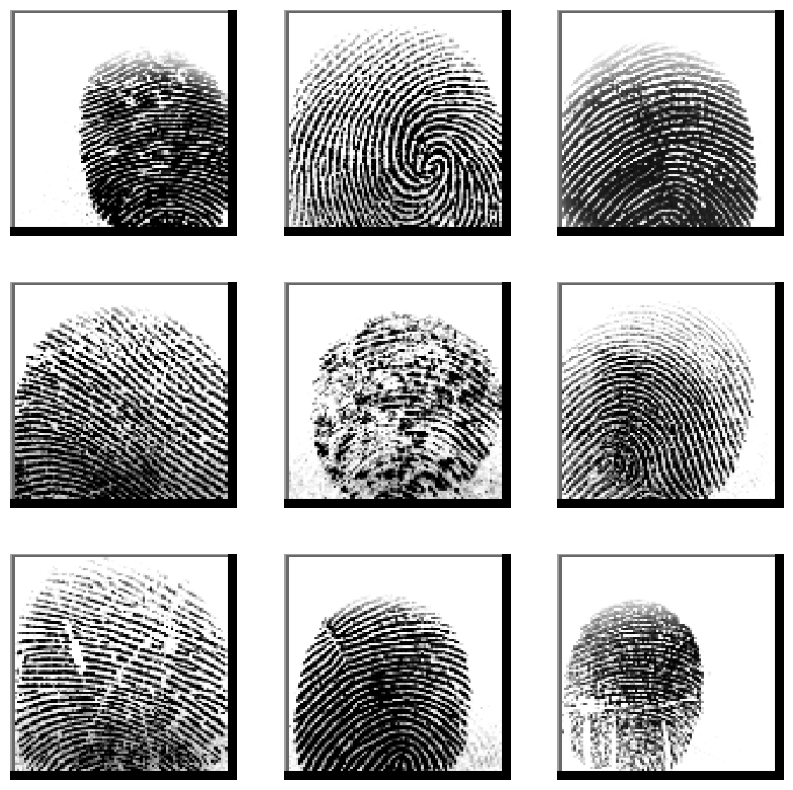

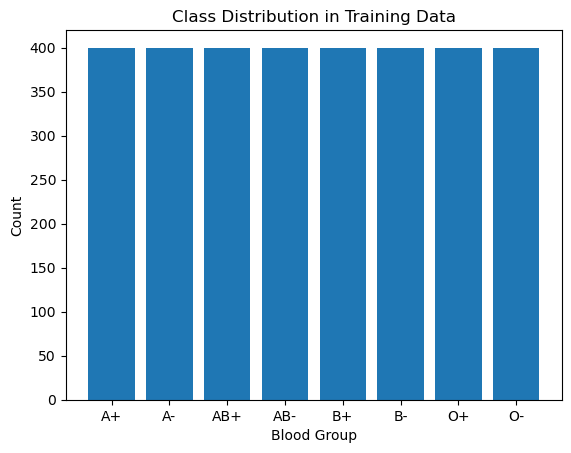

In [14]:

print('Class indices:', train_generator.class_indices)
print('Total Training Samples:', train_generator.samples)
print('Total Validation Samples:', validation_generator.samples)

# Visualize Sample Images
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

#Data Visualization
label_counts = np.bincount(train_generator.classes)
plt.bar(train_generator.class_indices.keys(), label_counts)
plt.xlabel('Blood Group')
plt.ylabel('Count')
plt.title('Class Distribution in Training Data')
plt.show()


# Step 5: Model Building using MobileNetV2

In [36]:

from tensorflow.keras.applications import MobileNetV2

input_shape = (224, 224, 3)  # Example input shape, adjust as needed
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

base_model.trainable = False



x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output_layer)



# 5. Compile the Model

In [37]:

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# 6. Model Training

In [ ]:
epochs = 15
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)


# 7. Model Evaluation

In [ ]:
validation_generator.reset()
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator.class_indices.keys())))


# 8. Save the Model

In [ ]:

model.save('modelf.h5')

print('Model trained and saved successfully as modelf.h5!')

# 9. Conclusion

In [ ]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()